# **<u>Introduction</u>**
Name: Ian Samoei 

Registration Number: P15/1898/2022


## **<u>Problem Overview</u>**
The task is to create a neural network that can recognise at least 4 digits from the MNIST dataset with high accuracy (>95%). The MNIST dataset contains 60,000 handwritten numbers along with their respective labels (Training set). The dataset also contains 10,000 images along with their labels for the purposes of testing (Test Dataset). The images are in a MNIST consists of grayscale (black and white ) images of size [28 × 28] pixels with each pixel value in the range [0, 255], O representing completely black while 255 representing a white pixel. The labels range between 0 - 9 representing the 10 decimal digits.

## **<u>Technical Overview</u>**
In order to solve this, we will create a multilayered neural network that we can train to recognize the images. 
The layers are:
### 1. Input Layer
The input layer will accept a 28 x 28 vector which represents the pixel values in each image. This leads to an input of a 784 dimensional vector.
### 2. Hidden Layer
It will be the layer in between the input and output and will use the ReLU activation function.
### 3. Output Layer
10 neurons (one for each digit), using the SoftMax activation function to output probabilities.

## <u>Step 1 : Preparing Data</u>



## Understanding the Data
Below is a picture of some of images in the dataset.(Internet Image)

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

The images are 28 x 28 pixels, and each pixel is a grayscale value between 0 and 255. The labels are numbers between 0 and 9, representing the digits drawn in the images. The data was collected from the National Institute of Standards and Technology (NIST) and modified to form the MNIST dataset. The dataset is split into two parts: 60,000 training images and 10,000 testing images. The data was collected from American Census Bureau employees and high school students.

For the sake of our own undertsanding of the data, we will load the data and display the first 5 images in the training set.
First, we need to undertsand the idx3-ubyte file format that the data is stored in. The data is stored in a binary file format that is not human readable. 
### IDX Format Structure
IDX files are binary files with a specific header format:

1. For Images (idx3):

    ***Header (16 bytes):***

    Bytes 0-3: Magic number (0x00000803 for images).

    Bytes 4-7: Number of images.

    Bytes 8-11: Number of rows per image (28 for MNIST).

    Bytes 12-15: Number of columns per image (28 for MNIST).

    For example, if we had an IDX file with just a single image, the first 16 bytes would be:

    ```
    0x00 0x00 0x08 0x03 0x00 0x00 0x00 0x01 0x00 0x1C 0x00 0x1C
    ```
    This would indicate that there is 1 image in the file, and that the image is 28x28 pixels.

    ***Data:***

    Each pixel is stored as an unsigned byte (values 0-255, where 0 is white and 255 is black).
    Total size = number of images × 28 × 28.

2. For Labels (idx1):

    ***Header (8 bytes):***

    Bytes 0-3: Magic number (0x00000801 for labels).

    Bytes 4-7: Number of labels.

    ***Data:***

    Each label is stored as an unsigned byte (0-9).

    Total size = number of labels.

Now that we have a simple understanding of the IDX file format, we can proceed to load the data and display the first 5 images in the training set. We will first create functions to load the data and display the images.

### How it will work:

**Header Parsing:**

The first few bytes of the file are interpreted as metadata (magic number, number of samples, dimensions, etc.).

**Data Extraction:**

The remaining bytes are the actual data (pixels or labels), read into a numpy array.

**Visualization:**

The pixel data is reshaped into a 2D array (28x28 for MNIST) and displayed as a grayscale image using Matplotlib.

## Installing Required Libraries
Before we get our hands dirty with the data, we need to install the required libraries. We will be using the following libraries:
matplotlib: For plotting the images.
numpy: For numerical operations.
tabulate: For displaying the data in a tabular format.

**None** of these libraries contain any pretrained models, so we will not be using any pretrained models in this notebook. We will be creating our own neural network from scratch.


In [11]:
pip install numpy tabulate matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Importing the dependencies

In [3]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import struct
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

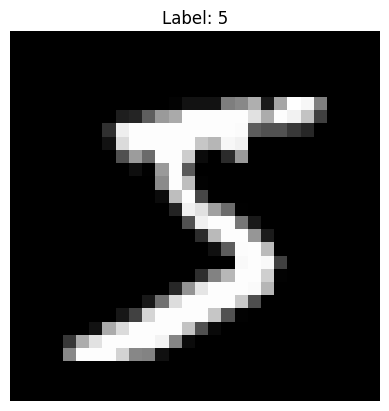

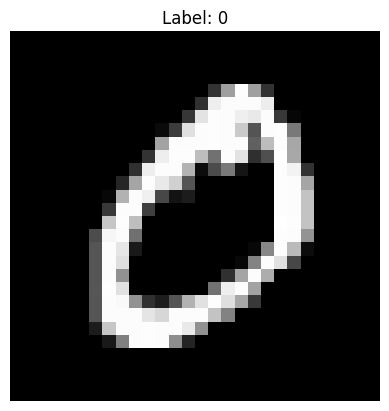

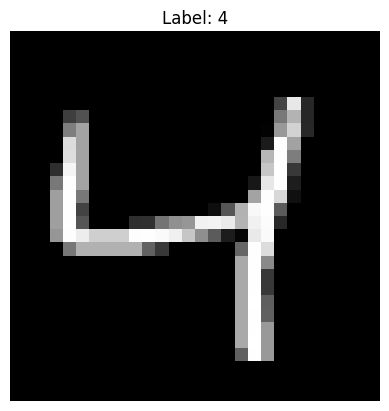

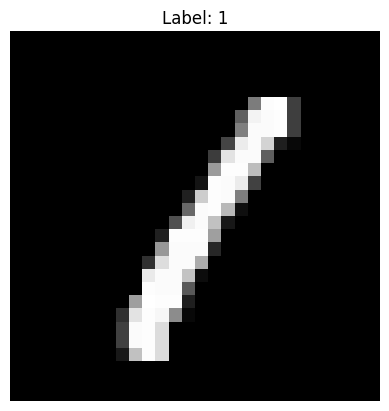

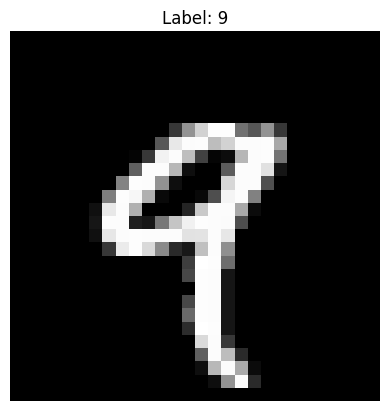

In [4]:
#Function to load the images from the IDX file
def load_images(file_path):
    with open(file_path, 'rb') as f:
        # Read the header
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != 2051:  # Check the magic number for images
            raise ValueError("Invalid IDX image file")
        
        # Read the image data
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        images = image_data.reshape(num_images, rows, cols)
    return images

#Function to load the labels from the IDX file
def load_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read the header
        magic, num_labels = struct.unpack(">II", f.read(8))
        if magic != 2049:  # Check the magic number for labels
            raise ValueError("Invalid IDX label file")
        
        # Read the label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

#Function to display an image
def display_image(images, labels, index):
    plt.imshow(images[index], cmap='gray')
    plt.title(f"Label: {labels[index]}")
    plt.axis('off')
    plt.show()

#Load the first 25 images and labels from the training set
images = load_images("train-images.idx3-ubyte")
labels = load_labels("train-labels.idx1-ubyte")

#Display the first 5 images
for i in range(5):
    display_image(images, labels, i)

#The code reads the images and labels from the IDX files and displays the first 5 images with their corresponding labels

# <u>Step 1: Loading the training data</u>

Now that we have some understanding of how the dataset is stored, we can proceed to load the data. We will create similar functions to load the data and labels. We will also use one hot encoding to convert the labels into a format that can be used by the neural network.

In [6]:
#Function to load the images
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))#Read the first 16 bytes
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows * cols)#Read the rest
    return images / 255.0  # Normalize to range [0, 1]
#Function to load the labels
def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))#Read the first 8 bytes
        labels = np.fromfile(f, dtype=np.uint8)#Read the rest
    return labels

#Load the images
x_train = load_mnist_images('train-images.idx3-ubyte')
y_train = load_mnist_labels('train-labels.idx1-ubyte')
x_test = load_mnist_images('t10k-images.idx3-ubyte')
y_test = load_mnist_labels('t10k-labels.idx1-ubyte')

# Function to one-hot encode the labels
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

#One-hot encode the labels
y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

# <u>Step 2: Defining the Neural Network</u>

In [7]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros(output_size)

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        return (x > 0).astype(float) # Derivative of ReLU , 1 if x > 0, 0 otherwise

    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    @staticmethod
    def cross_entropy_loss(predictions, labels):
        return -np.mean(np.sum(labels * np.log(predictions + 1e-9), axis=1))  # Avoid log(0)

    def forward(self, x):
        # Forward pass
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.softmax(self.output_input)
        return self.output

    def backward(self, x, y, predictions):
        # Output layer gradient
        output_error = predictions - y
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error)
        d_bias_output = np.sum(output_error, axis=0)

        # Hidden layer gradient
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.relu_derivative(self.hidden_input)
        d_weights_input_hidden = np.dot(x.T, hidden_error)
        d_bias_hidden = np.sum(hidden_error, axis=0)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_output -= self.learning_rate * d_bias_output
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_hidden -= self.learning_rate * d_bias_hidden

    def train(self, x, y, epochs=10, batch_size=64):
        for epoch in range(epochs):
            indices = np.arange(x.shape[0])
            np.random.shuffle(indices)
            x = x[indices]
            y = y[indices]
            
            for i in range(0, x.shape[0], batch_size):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                
                predictions = self.forward(x_batch)
                self.backward(x_batch, y_batch, predictions)
            
            # Compute loss
            predictions = self.forward(x)
            loss = self.cross_entropy_loss(predictions, y)
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")


## <u>Step 3: Training and Evaluation</u>
In this step, we will train the neural network using the training data and evaluate its performance using the test data.
After training the model, we will evaluate its performance using the test data. We will calculate the accuracy of the model on the test data and plot the confusion matrix to see how well the model is performing for each digit.

In [8]:
# Initialize the neural network
nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.01)

# Train the network
nn.train(x_train, y_train, epochs=10, batch_size=64)

# Evaluate on test data
predictions = nn.forward(x_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1, Loss: 0.1121
Epoch 2, Loss: 0.0750
Epoch 3, Loss: 0.0645
Epoch 4, Loss: 0.0437
Epoch 5, Loss: 0.0384
Epoch 6, Loss: 0.0250
Epoch 7, Loss: 0.0238
Epoch 8, Loss: 0.0197
Epoch 9, Loss: 0.0211
Epoch 10, Loss: 0.0086
Test Accuracy: 97.97%


Confusion Matrix:
[[ 968    1    2    1    2    2    0    1    1    2]
 [   0 1127    2    1    0    0    0    1    4    0]
 [   1    2 1003    5    3    0    2    5   10    1]
 [   0    2    4  993    1    2    0    1    0    7]
 [   2    0    5    0  959    0    1    2    1   12]
 [   1    0    0    6    0  873    2    3    6    1]
 [   1    3    2    1    7   10  932    0    2    0]
 [   0    4    9    2    0    1    0 1003    2    7]
 [   1    1    4    5    1    6    2    3  947    4]
 [   1    2    0    2    4    1    1    3    3  992]]


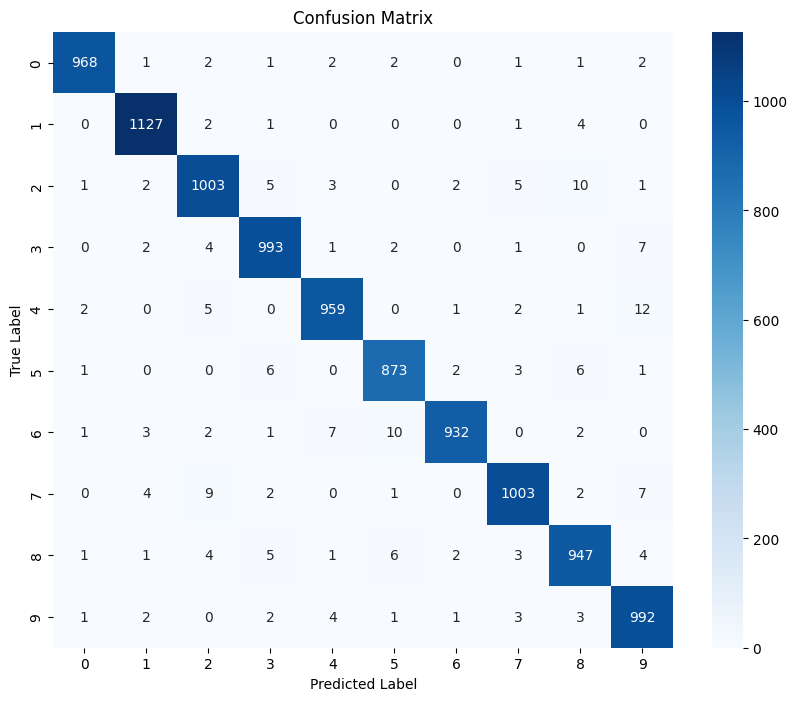

In [9]:
# Get predictions for the test set
predictions = nn.forward(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
def compute_confusion_matrix(true_labels, predicted_labels, num_classes=10):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true_labels, predicted_labels):
        confusion_matrix[true, pred] += 1
    return confusion_matrix

conf_matrix = compute_confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

class_names = [str(i) for i in range(10)]  # Class names for digits 0-9
plot_confusion_matrix(conf_matrix, class_names)

## Secondary Evaluation
Now that our neural network has a relatively high accuracy of ~ 97%, we need to check if it satisfies the conditions we had at the beginning of the notebook, which was making sure that it can recognise at least 4 images accurately. +
We will do this by evaluating the accuracy of the model for each unique digit in the dataset.

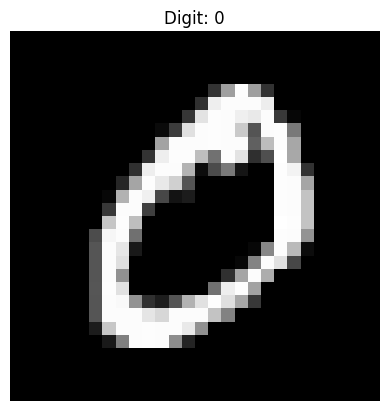

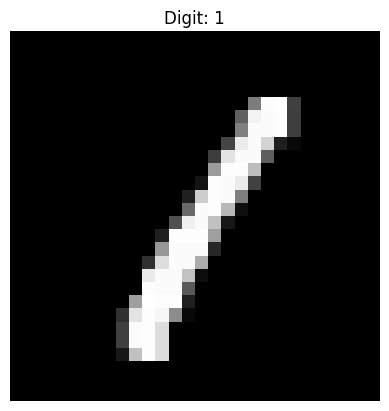

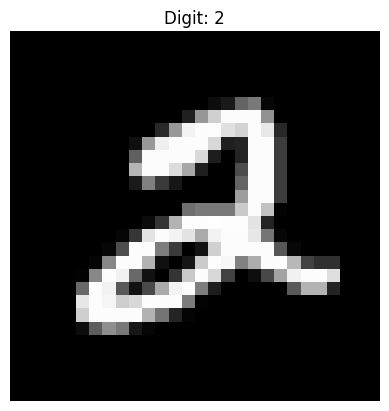

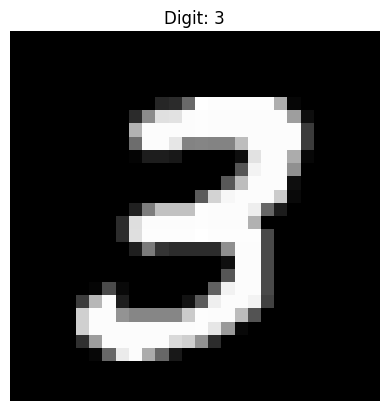

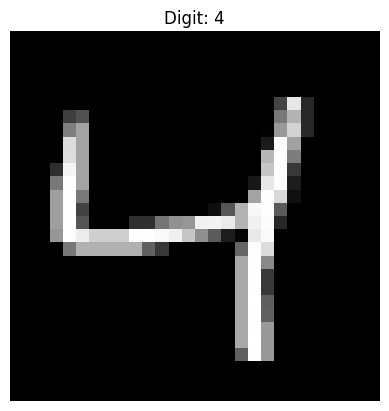

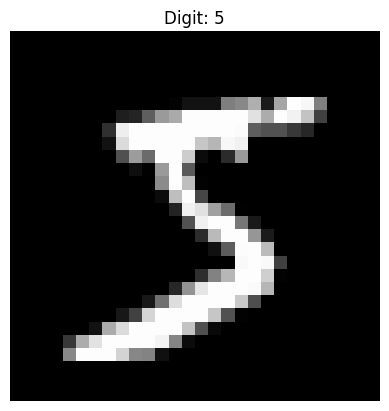

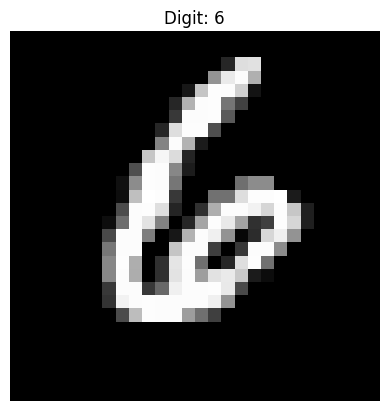

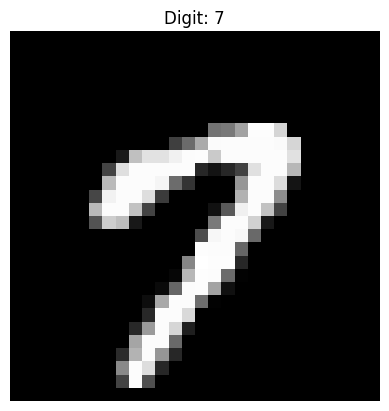

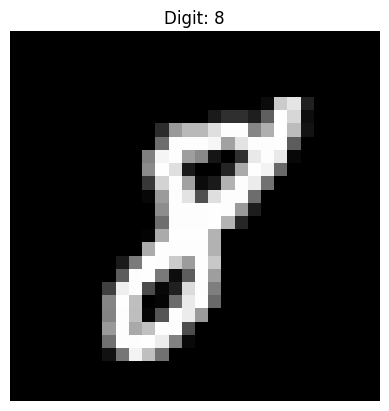

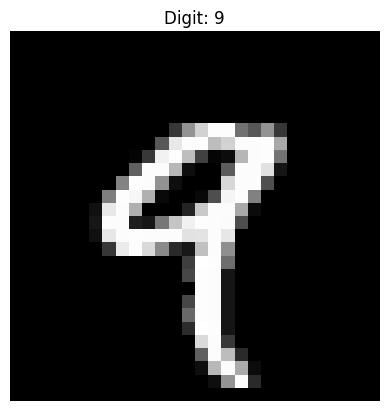

+---------+------------+
|   Digit | Accuracy   |
+=========+============+
|       0 | 98.78%     |
+---------+------------+
|       1 | 99.30%     |
+---------+------------+
|       2 | 97.19%     |
+---------+------------+
|       3 | 98.32%     |
+---------+------------+
|       4 | 97.66%     |
+---------+------------+
|       5 | 97.87%     |
+---------+------------+
|       6 | 97.29%     |
+---------+------------+
|       7 | 97.57%     |
+---------+------------+
|       8 | 97.23%     |
+---------+------------+
|       9 | 98.32%     |
+---------+------------+


In [10]:
# 1. Function to find a sample image for each unique digit
def get_sample_images(images, labels):
    samples = {}
    for i in range(10):  # Digits 0-9
        indices = np.where(labels == i)[0]  # Find all occurrences of each digit
        if len(indices) > 0:
            samples[i] = images[indices[0]]  # Use the first occurrence
    return samples

# 2. Function to calculate accuracy for each digit
def calculate_digit_accuracy(predictions, true_labels):
    accuracies = {}
    for i in range(10):  # Digits 0-9
        indices = np.where(true_labels == i)[0]
        if len(indices) > 0:
            digit_predictions = predictions[indices]
            digit_true_labels = true_labels[indices]
            accuracy = np.mean(digit_predictions == digit_true_labels)
            accuracies[i] = accuracy
    return accuracies

# 3. Function to display results
def display_results(samples, accuracies):
    # Display sample images and accuracies
    table = []
    for digit, image in samples.items():
        plt.figure()
        plt.imshow(image, cmap="gray")
        plt.title(f"Digit: {digit}")
        plt.axis("off")
        plt.show()

        table.append([digit, f"{accuracies[digit] * 100:.2f}%"])

    # Print results in a table
    print(tabulate(table, headers=["Digit", "Accuracy"], tablefmt="grid"))

# Load dataset and model predictions
# Assuming `images`, `labels`, `predicted_labels` are loaded and defined
samples = get_sample_images(images, labels)
accuracies = calculate_digit_accuracy(predicted_labels, true_labels)

# Display results
display_results(samples, accuracies)


# Conclusion
In this notebook, we created a neural network from scratch to recognize handwritten digits from the MNIST dataset. We achieved an accuracy of over 97% on the test data, which is well above the 95% threshold we set at the beginning of the notebook. We also evaluated the accuracy of the model for each unique digit in the dataset and found that the model performs well for all digits, more than just the 4 required . This shows that the model is robust and can recognize all digits accurately.